<a href="https://colab.research.google.com/github/ananyagoyal1/Machine-Learning/blob/main/ID3_and_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model dataset: Iris dataset
Number of attributes: 4
Number of instances: 150

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


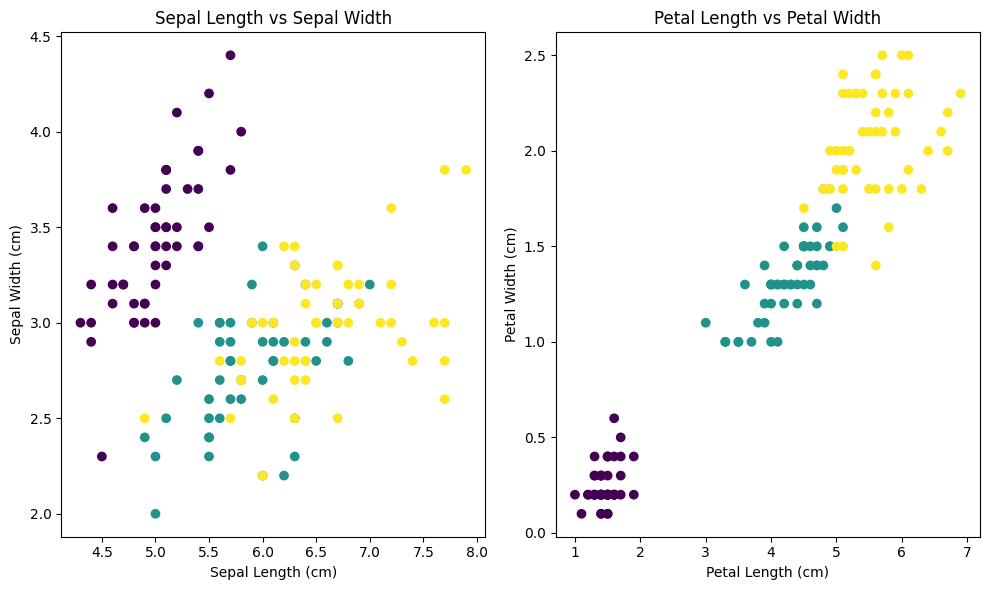


Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64


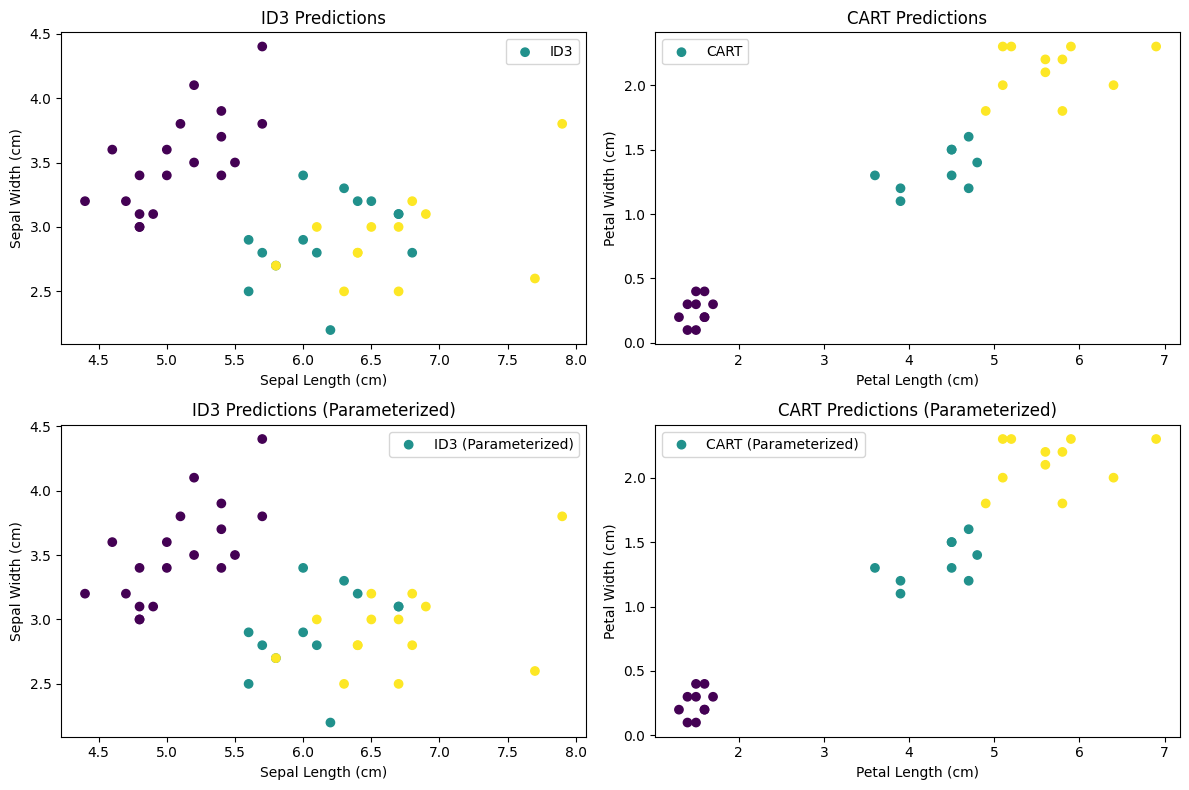

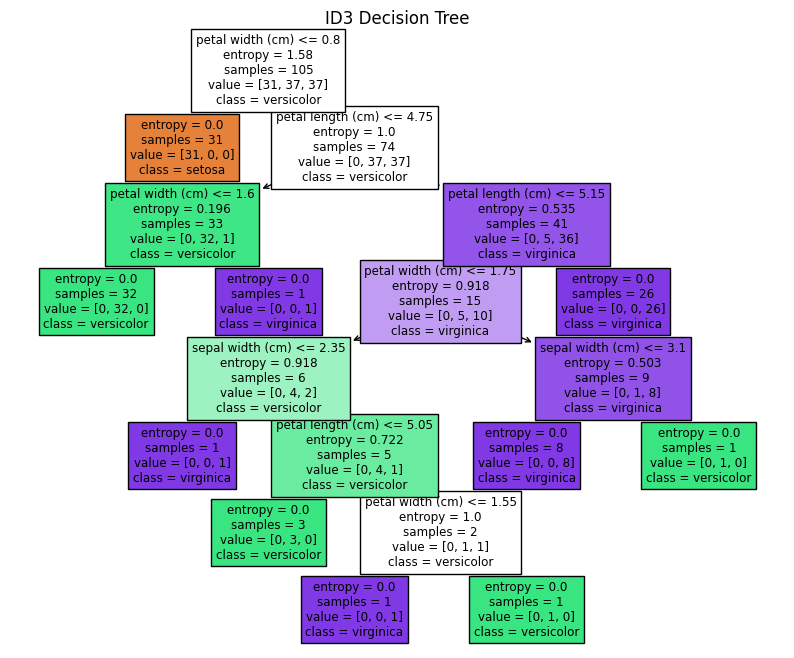


ID3 Accuracy: 0.9777777777777777
ID3 F1-Score: 0.9743209876543211

CART Accuracy: 1.0
CART F1-Score: 1.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import plot_tree

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Model dataset
print("Model dataset: Iris dataset")

# Number of attributes
num_attributes = X.shape[1]
print("Number of attributes:", num_attributes)

# Number of instances
num_instances = X.shape[0]
print("Number of instances:", num_instances)

# 1. Load the dataset into Pandas data frame
df = pd.DataFrame(X, columns=iris.feature_names)
df['Target'] = y

# 2. Print the attributes/values/unique features of the dataset using any of the available methods
print("\nDataset Information:")
print(df.info())

# 3. Visualize the dataset using any two graphs
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['Target'])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.subplot(1, 2, 2)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['Target'])
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.tight_layout()
plt.show()

# 4. Check for NIL values
print("\nMissing Values:")
print(df.isnull().sum())

# 5. Perform the training and test set split up using 70:30 and 80:20 ratios
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Perform training and predictions using ID3 and CART
dt_id3 = DecisionTreeClassifier(criterion='entropy')
dt_id3.fit(X_train, y_train)
id3_preds = dt_id3.predict(X_test)

dt_cart = DecisionTreeClassifier(criterion='gini')
dt_cart.fit(X_train_80, y_train_80)
cart_preds = dt_cart.predict(X_test_20)

# 7. Change the DT parameters such as criterion, depth and random state
dt_id3_params = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dt_id3_params.fit(X_train, y_train)
id3_params_preds = dt_id3_params.predict(X_test)

dt_cart_params = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_cart_params.fit(X_train_80, y_train_80)
cart_params_preds = dt_cart_params.predict(X_test_20)

# 8. Plot the outputs individually and as a whole for all
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=id3_preds, marker='o', label='ID3')
plt.title('ID3 Predictions')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(X_test_20[:, 2], X_test_20[:, 3], c=cart_preds, marker='o', label='CART')
plt.title('CART Predictions')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=id3_params_preds, marker='o', label='ID3 (Parameterized)')
plt.title('ID3 Predictions (Parameterized)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(X_test_20[:, 2], X_test_20[:, 3], c=cart_params_preds, marker='o', label='CART (Parameterized)')
plt.title('CART Predictions (Parameterized)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.tight_layout()
plt.show()

# 9. Plot the tree and print the accuracy and F1 score
plt.figure(figsize=(10, 8))
plot_tree(dt_id3, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title('ID3 Decision Tree')
plt.show()

id3_accuracy = accuracy_score(y_test, id3_preds)
id3_f1 = f1_score(y_test, id3_preds, average='macro')
print("\nID3 Accuracy:", id3_accuracy)
print("ID3 F1-Score:", id3_f1)

cart_accuracy = accuracy_score(y_test_20, cart_preds)
cart_f1 = f1_score(y_test_20, cart_preds, average='macro')
print("\nCART Accuracy:", cart_accuracy)
print("CART F1-Score:", cart_f1)

